## Itertools Revisited

### itertools.combinations
Use combinations when we want to carry out analysis on each subset of a group.

In [1]:
from itertools import combinations
for pair in combinations( 'ABCD',2 ):
    print( pair )

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


### itertools.permutations
In contrast to itertools.combinations (which preserves order), we use permutations when we want all of the elements in every possible order:

In [2]:
from itertools import permutations
for triplet in permutations( 'ABCD',3 ):
    print( triplet )

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


### itertools.product
itertools.product mimics a nested for loop.

In [4]:
from itertools import product
for a,b in product( 'abc','ABC' ):
    print( a,b )

a A
a B
a C
b A
b B
b C
c A
c B
c C


## scipy.optimize.brute
scipy.optimize.brute can be used to find a brute-force solution to a function of one or more variables. (Note that this applies to continuous domains, not discrete ones.) brute evaluates the function across a grid of points, which means it can miss fine details.

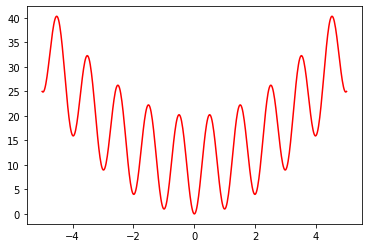

In [5]:
import numpy as np
def f( x ):
    return 10 + x ** 2 - 10 * np.cos( 2 * np.pi * x )

import matplotlib.pyplot as plt
x = np.linspace( -5,5,501 )
y = f( x )
plt.plot( x,y,'r-' )
plt.show()

In [8]:
import scipy.optimize as spo
result = spo.brute( f,( ( -5,5 ), ))
print( result )

[-1.98988744]


In [9]:
result = spo.brute( f,( ( -5,5 ), ),full_output=True )
print( result )

(array([-1.98988744]), 3.9798313122836664, array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]), array([25.        , 39.87746345, 16.12354503, 30.49833862, 10.48809629,
       22.382234  ,  7.92387022, 15.74825619,  8.16841383, 10.89504553,
       10.89504553,  8.16841383, 15.74825619,  7.92387022, 22.382234  ,
       10.48809629, 30.49833862, 16.12354503, 39.87746345, 25.        ]))


In [10]:
result = spo.brute( f,( ( -5,5 ), ),full_output=True,Ns=25 )
print( result )

(array([0.]), 0.0, array([-5.        , -4.58333333, -4.16666667, -3.75      , -3.33333333,
       -2.91666667, -2.5       , -2.08333333, -1.66666667, -1.25      ,
       -0.83333333, -0.41666667,  0.        ,  0.41666667,  0.83333333,
        1.25      ,  1.66666667,  2.08333333,  2.5       ,  2.91666667,
        3.33333333,  3.75      ,  4.16666667,  4.58333333,  5.        ]), array([25.        , 39.66719848, 22.36111111, 24.0625    , 26.11111111,
        9.84669041, 26.25      ,  5.68002374, 17.77777778, 11.5625    ,
        5.69444444, 18.83386515,  0.        , 18.83386515,  5.69444444,
       11.5625    , 17.77777778,  5.68002374, 26.25      ,  9.84669041,
       26.11111111, 24.0625    , 22.36111111, 39.66719848, 25.        ]))


### example

In [13]:
def f( x ):
    return np.cos(x)+2+x**3-3*x

In [15]:
result = spo.brute( f,( ( 0,5 ), ))
print( result )

[1.14155016]


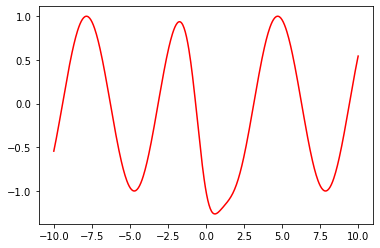

In [20]:
def f( x ):
    return -np.exp(-x**2)-np.sin(x)
x = np.linspace( -10,10,501 )
y = f( x )
plt.plot( x,y,'r-' )
plt.show()

In [21]:
result = spo.brute( f,( ( -10,10 ), ))
print( result )

[0.58778783]


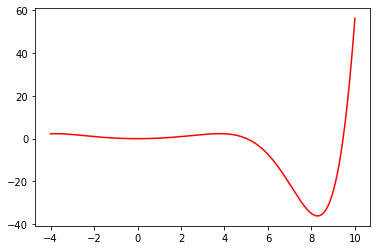

In [22]:
import scipy
x = np.linspace( -4,10,501 )
y = scipy.special.bei(x)
plt.plot( x,y,'r-' )
plt.show()

In [23]:
result = spo.brute( scipy.special.bei,( ( -4,10 ), ))
print( result )

[8.28099686]


In [30]:
import numpy as np
def eqn( x ):
    '''
    Represent the equation cos(x) + 2 = x^3 - x^2
    '''
    return ( np.sin(x)+2*x+1 ) - ( x**3/4 - 2*x**2+x )

In [33]:
def dfdx( f,x,h=1e-3 ):
    return ( f( x+h ) - f( x ) ) / h

def newton( f,x0,tol=1e-3 ):
    d = abs( 0 - f( x0 ) )
    while d > tol:
        x0 = x0 - f( x0 ) / dfdx( f,x0 )
        d = abs( 0 - f( x0 ) )
    return ( x0,f( x0 ) )

In [34]:
newton( eqn,0)

(8.563074197470577, -1.1358509190984023e-06)

In [28]:
def linspace(a,b,n=10):
    t=(b-a)*1.0/n
    r=[]
    for i in range(n):
        r.append(a+i*t)
    r.append(b)
    return r

In [29]:
linspace(0,1,10)

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1]